In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

data_folder = Path("../../data")

# Necessary for notebook to see src package
import sys
sys.path.append('../..')

Device: cuda


# Download Dataset into Memory

In [18]:
dataset = pd.read_csv(data_folder / 'Credit' / 'data.csv')
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,35628.0,-1.370413,1.095589,-0.668018,-0.024219,1.675652,3.823629,-0.634559,1.836666,-0.485368,...,-0.151058,-0.609795,0.027077,0.986022,0.079739,-0.463951,0.063528,0.006793,38.31,0
1,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
2,81998.0,-1.789123,0.941366,1.432897,-1.318458,-0.450124,-1.290731,0.933642,-0.306360,0.917978,...,-0.292198,-0.202022,-0.017159,0.740137,-0.183085,0.692176,0.488185,0.418299,70.00,0
3,46114.0,-0.711379,-1.431688,0.630874,-2.551985,0.509280,-0.565154,0.258866,-0.289951,-2.680067,...,-0.361539,-1.064836,0.435373,-0.932473,-0.459677,-0.759301,-0.094306,-0.053401,145.50,0
4,41224.0,1.303287,1.023966,-3.187599,0.468391,3.353988,2.431416,0.184510,0.622721,-0.556254,...,-0.265551,-0.823366,-0.241908,0.674554,1.012236,-0.278656,0.041260,0.089912,1.00,0
5,118959.0,2.079435,0.057972,-1.753622,0.418052,0.316720,-0.884450,0.087868,-0.153041,0.710701,...,-0.384833,-1.069208,0.350853,0.443416,-0.298244,0.179773,-0.071796,-0.034166,0.89,0
6,137608.0,-0.789304,0.107723,0.655574,1.105067,-0.115432,0.773314,-0.833790,0.789969,1.185240,...,0.200868,0.906606,0.226520,-1.154971,-0.610361,-0.507381,0.084316,0.047703,47.30,0
7,163746.0,-0.134683,0.518785,0.964579,0.355104,0.437104,-0.591002,1.022191,-0.272317,0.229757,...,0.145125,0.575054,0.004129,-0.081314,-0.730483,-0.820768,0.072393,0.014246,46.25,0
8,143943.0,2.079452,0.165490,-1.767843,0.368335,0.550175,-0.696191,0.183157,-0.213943,0.466546,...,-0.367237,-0.930856,0.323828,0.326098,-0.242497,0.186283,-0.057982,-0.032292,0.99,0
9,61675.0,1.196689,-0.075259,0.081766,0.690997,-0.094079,-0.017219,-0.031813,0.029995,0.537995,...,-0.162328,-0.314486,-0.106366,-0.447657,0.550614,0.431925,-0.023346,0.001163,28.00,0


# Missing Values

There is no missing values in CTABGAN+ datasets but i am just making sure

In [19]:
print(f'Missing values in the dataset: {dataset.isna().sum().sum()}')

Missing values in the dataset: 0


# General Info

- Column `education-num` had the same info as the `education` column so it was safe an beneficial to drop that column 
- We can see that the columns _workclass_, _education_, _marital-status_, _occupation_, _relationship_, _race_, _gender_, _native-country_, _income_ are categorical variables.

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  float64
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [21]:
# No String Columns and most of the categorical columns are binary

string_columns = [col for col in dataset.columns if dataset[col].dtype == 'object']
other_columns = [col for col in dataset.columns if col not in string_columns]

print(f'String cols: {string_columns}')
print(f'Other cols: {other_columns}')

String cols: []
Other cols: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


# Other Columns and Their Cardinalities

In [22]:
for col in other_columns:
    print(f'{col:<20}: {dataset[col].dtype}({dataset[col].unique().__len__()})')

Time                : float64(41967)
V1                  : float64(49431)
V2                  : float64(49431)
V3                  : float64(49431)
V4                  : float64(49431)
V5                  : float64(49431)
V6                  : float64(49431)
V7                  : float64(49431)
V8                  : float64(49431)
V9                  : float64(49431)
V10                 : float64(49431)
V11                 : float64(49431)
V12                 : float64(49431)
V13                 : float64(49431)
V14                 : float64(49431)
V15                 : float64(49431)
V16                 : float64(49431)
V17                 : float64(49431)
V18                 : float64(49431)
V19                 : float64(49431)
V20                 : float64(49431)
V21                 : float64(49431)
V22                 : float64(49431)
V23                 : float64(49431)
V24                 : float64(49431)
V25                 : float64(49431)
V26                 : float64(49431)
V

# Categorical and Numerical Columns

In [23]:
binary_columns = [col for col in other_columns if dataset[col].unique().__len__() <= 2]
multi_class_columns = [col for col in other_columns if (dataset[col].unique().__len__() > 2) and (dataset[col].unique().__len__() <= 10) ]
numeric_columns = [col for col in other_columns if col not in binary_columns and col not in multi_class_columns]

binary_columns = binary_columns + [col for col in string_columns if dataset[col].unique().__len__() <= 2]
multi_class_columns = multi_class_columns + [col for col in string_columns if (dataset[col].unique().__len__() > 2)]

print(f'binary_columns({len(binary_columns)}): {binary_columns}')
print(f'multi_class_columns({len(multi_class_columns)}): {multi_class_columns}')
print(f'numeric_columns({len(numeric_columns)}): {numeric_columns}')

binary_columns(1): ['Class']
multi_class_columns(0): []
numeric_columns(30): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# Single Mode Gaussian Variables 

Here we can see that `age` is a single mode Gaussion variable

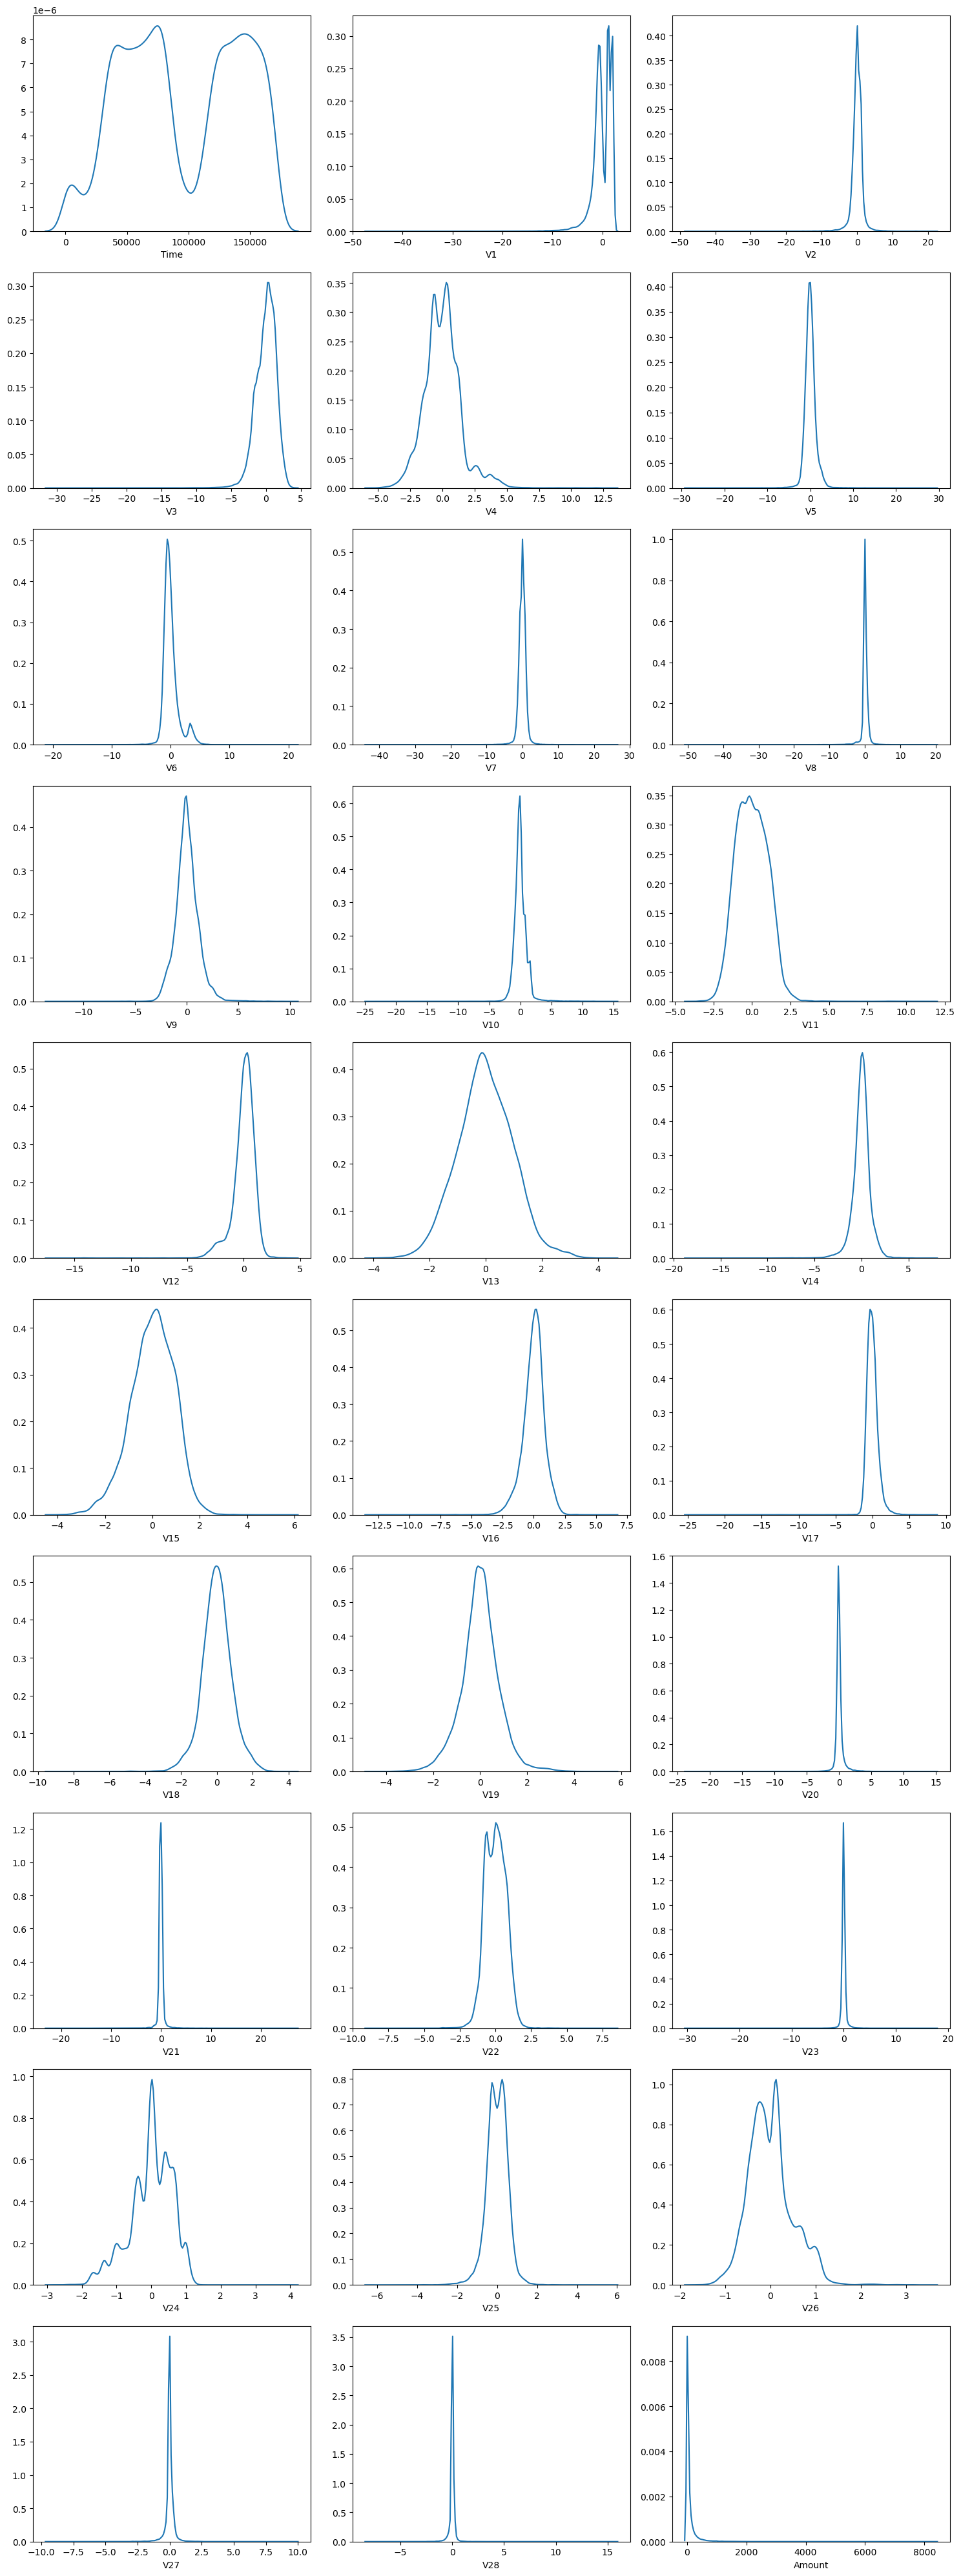

In [24]:
import math
from matplotlib.axes import Axes

fig = plt.figure(figsize=(15, math.ceil(len(numeric_columns) / 3.0) * 4))
ax = fig.subplots(nrows=math.ceil(len(numeric_columns) / 3.0), ncols=3)

for col_index in range(len(numeric_columns)):
    current_ax: Axes = ax[math.floor(col_index / 3.0)][col_index % 3]
    sns.kdeplot(
        data=dataset[numeric_columns[col_index]],
        ax=current_ax,
        common_norm=False,
    )
    current_ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Mixed Type Variables

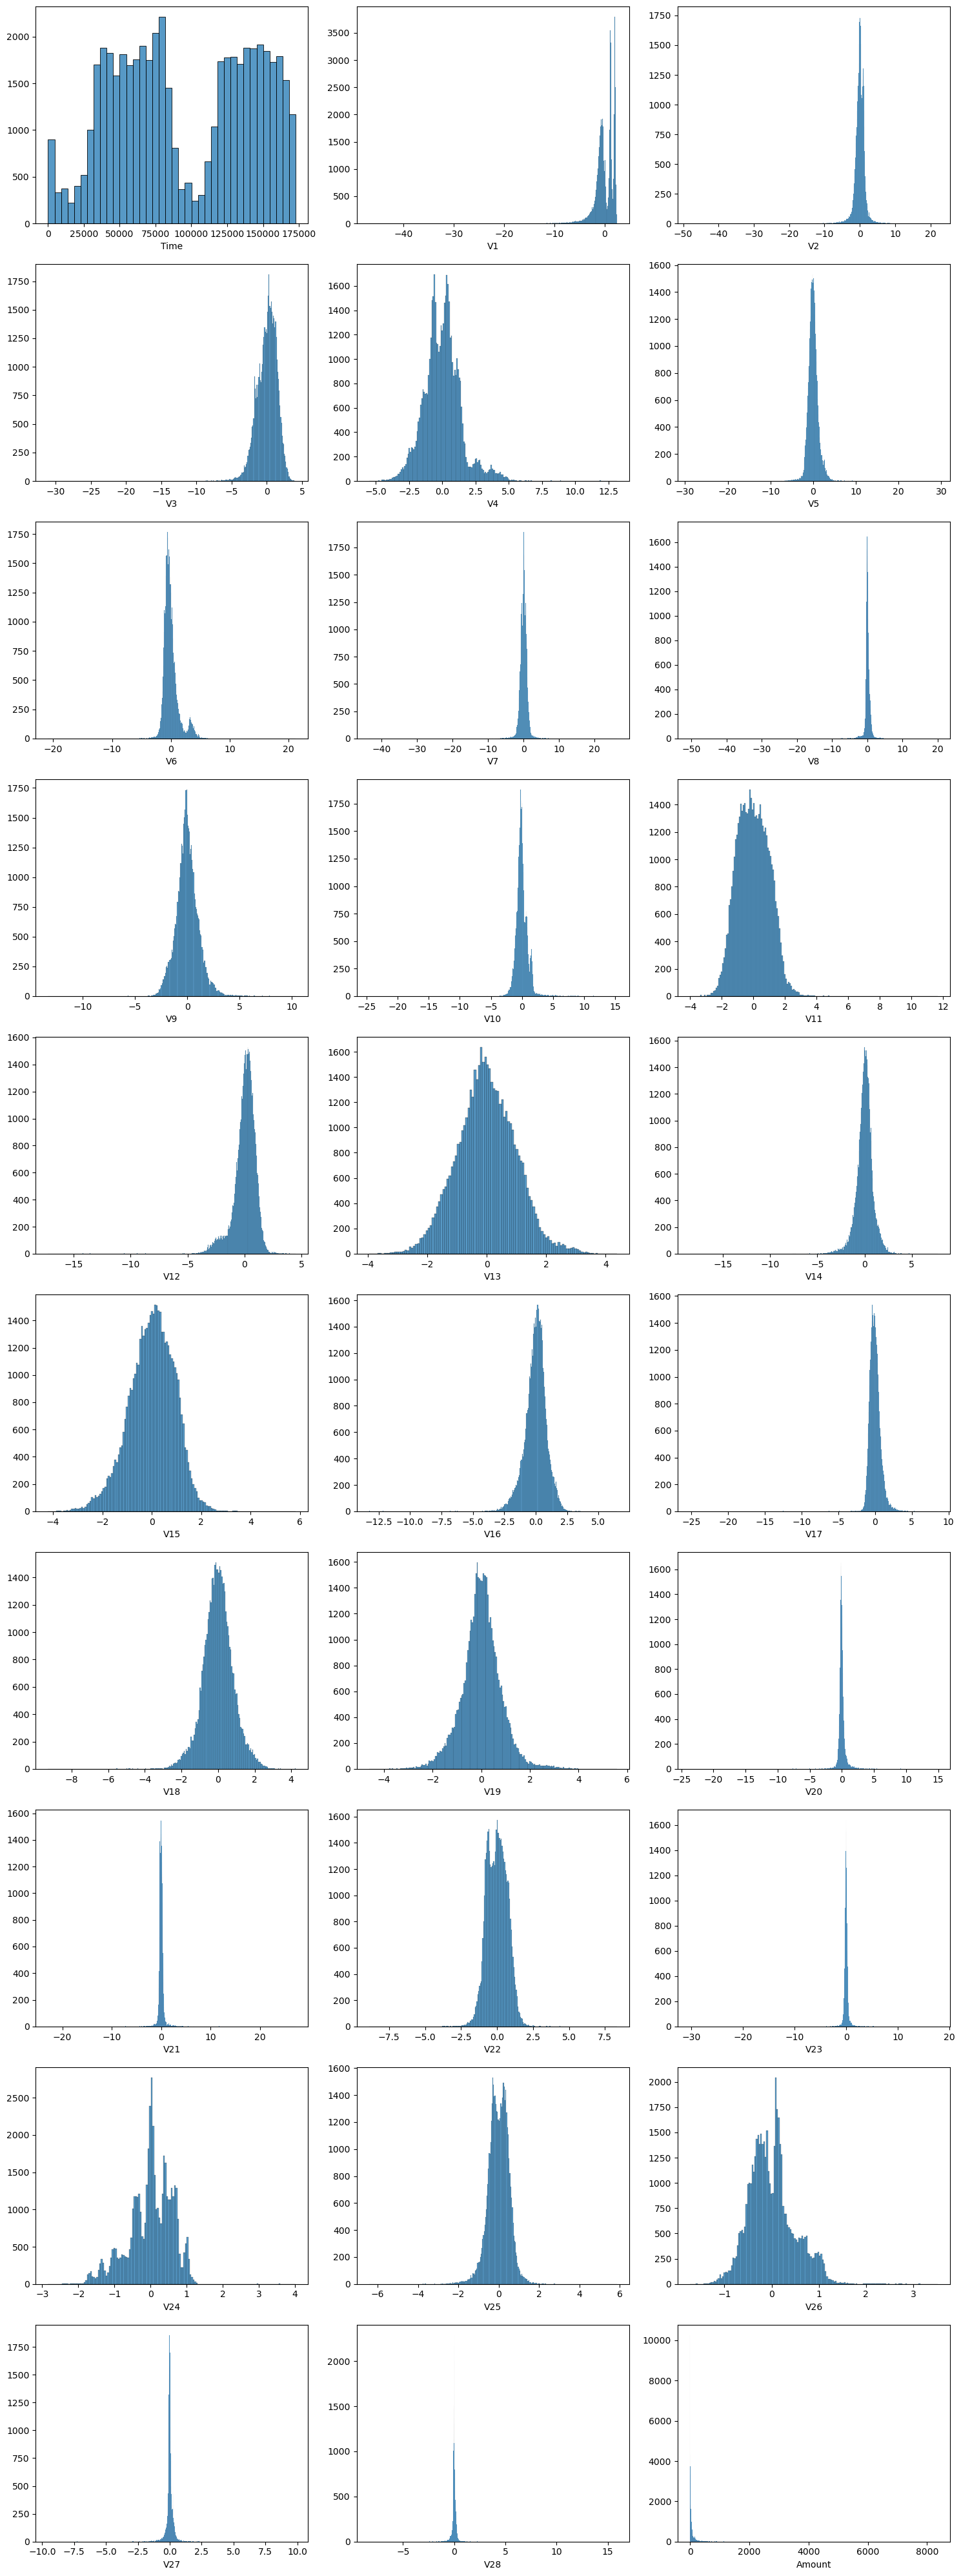

In [25]:
import math
from matplotlib.axes import Axes

fig = plt.figure(figsize=(15, math.ceil(len(numeric_columns) / 3.0) * 4))
ax = fig.subplots(nrows=math.ceil(len(numeric_columns) / 3.0), ncols=3)

for col_index in range(len(numeric_columns)):
    current_ax: Axes = ax[math.floor(col_index / 3.0)][col_index % 3]
    sns.histplot(
        data=dataset[numeric_columns[col_index]],
        ax=current_ax,
    )
    current_ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Categorical Variables

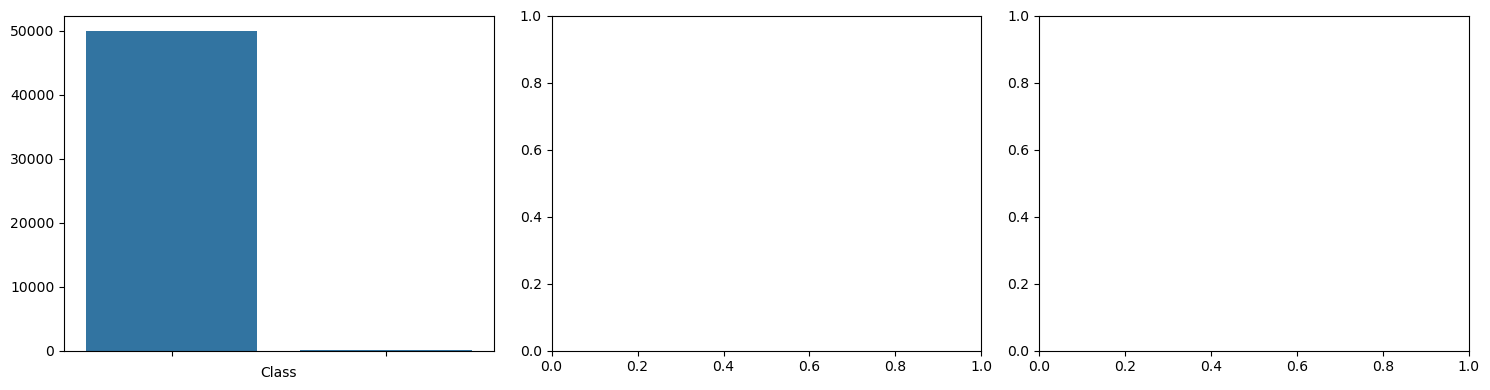

In [26]:
import math
from matplotlib.axes import Axes

categorical_columns = multi_class_columns + binary_columns

fig = plt.figure(figsize=(15, math.ceil(len(categorical_columns) / 3.0) * 4))
ax = fig.subplots(nrows=math.ceil(len(categorical_columns) / 3.0), ncols=3)

for col_index in range(len(categorical_columns)):
    current_ax: Axes = ax[math.floor(col_index / 3.0)]
    sns.countplot(
        data=dataset,
        x=categorical_columns[col_index],
        ax=current_ax,
    )
    current_ax.set_ylabel('')
    current_ax.set_xticklabels([])
plt.tight_layout()
plt.show()

In [27]:
general_columns = numeric_columns.copy()
general_columns.remove('Time')
print(general_columns)
print(numeric_columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


The final argumnets for the dataset is:

In [28]:
import json

args = {
    'missing_values': False,
    'categorical_columns' : categorical_columns,
    'log_columns': ['Amount'],
    'mixed_columns': {},                                   # Mixed Type
    'general_columns': general_columns,                    # Single Gaussian Mode or Highly cardinal data
    'non_categorical_columns': [],
    'integer_columns': ['Time'],
    'problem_type': 'classification',
    'target': 'Covertype'
}

with open(data_folder / 'Credit' / 'metadata.json', 'w+') as file:
    json.dump(args, file, indent=4)

In [29]:
args

{'missing_values': False,
 'categorical_columns': ['Class'],
 'log_columns': ['Amount'],
 'mixed_columns': {},
 'general_columns': ['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount'],
 'non_categorical_columns': [],
 'integer_columns': ['Time'],
 'problem_type': 'classification',
 'target': 'Covertype'}